<a href="https://colab.research.google.com/github/AdityaIngale29/SOC/blob/main/Loan_Prediction_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
from google.colab import files

uploaded=files.upload()

Saving madfhantr.csv to madfhantr.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['madfhantr.csv']))
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


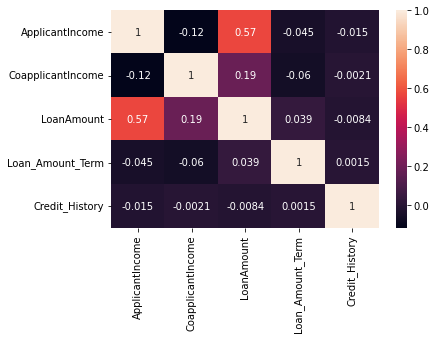

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# To convert all the columns with categorical data in one shot

df_1=pd.get_dummies(df,prefix='',prefix_sep='',columns=['Gender','Married','Education','Self_Employed','Property_Area'])
df_1

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
0,LP001002,0,5849,0.0,NaN,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,1,0,1,0,1,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,1,0,1,0,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1


In [ ]:
df_1=df_1.dropna() #It drops all the rows which contains NaN value
df_1

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,1,0,1,0,1,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,1,0,1,0,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1


In [ ]:
my_array=df_1['Loan_Status'].to_numpy()
data=pd.DataFrame(my_array)
data_1=pd.get_dummies(data)
data_1 #This is your Y for Linear regression

,0_N,0_Y
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
512,0,1
513,0,1
514,0,1
515,0,1


In [ ]:
#df_1.Dependents.unique() #This func will tell us unique values present in a column.
df_1['Dependents']=df_1['Dependents'].replace(['3+'],['3'])
df_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,1,0,1,0,1,0,0
610,LP002979,3,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,1,0,1,0,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1


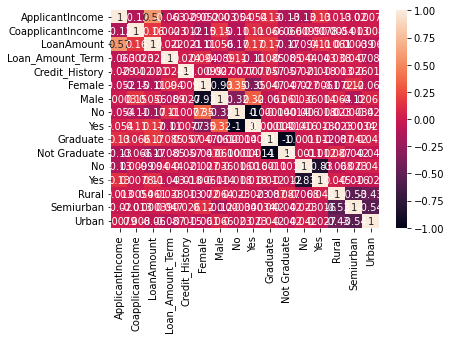

In [ ]:
sns.heatmap(df_1.corr(),annot=True)

In [ ]:
df_1=df_1.drop(columns=['Loan_Status'])
df_1=df_1.drop(columns=['Loan_ID'])
df_1 #This is your X for Linear regression         

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [ ]:
X=df_1.iloc[:,:]
y=data_1.iloc[:,:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_pred=regressor.predict(X_train)
y_train_pred

array([[ 0.05003737,  0.94996263],
       [ 0.34816748,  0.65183252],
       [ 0.21256288,  0.78743712],
       [ 0.0998841 ,  0.9001159 ],
       [ 0.07833193,  0.92166807],
       [ 0.19367652,  0.80632348],
       [ 0.05095532,  0.94904468],
       [ 0.14623157,  0.85376843],
       [ 0.23172529,  0.76827471],
       [ 1.04093302, -0.04093302],
       [ 0.21748581,  0.78251419],
       [ 0.8718265 ,  0.1281735 ],
       [ 0.31344381,  0.68655619],
       [ 0.78782321,  0.21217679],
       [ 0.12594875,  0.87405125],
       [ 0.88554224,  0.11445776],
       [ 0.41242417,  0.58757583],
       [ 0.25300599,  0.74699401],
       [ 0.34590061,  0.65409939],
       [ 0.16004365,  0.83995635],
       [ 0.13333062,  0.86666938],
       [ 0.28961537,  0.71038463],
       [ 0.21465463,  0.78534537],
       [ 0.22082182,  0.77917818],
       [ 0.22130196,  0.77869804],
       [ 0.90444157,  0.09555843],
       [ 0.24752226,  0.75247774],
       [ 0.15727966,  0.84272034],
       [ 0.99407718,

In [ ]:
y_test_pred=regressor.predict(X_test)
y_test_pred

array([[0.36909526, 0.63090474],
       [0.39486376, 0.60513624],
       [0.23191561, 0.76808439],
       [0.03675811, 0.96324189],
       [0.30949359, 0.69050641],
       [0.99464881, 0.00535119],
       [0.29758017, 0.70241983],
       [0.09281036, 0.90718964],
       [0.18967053, 0.81032947],
       [0.37066404, 0.62933596],
       [0.08894918, 0.91105082],
       [0.19661175, 0.80338825],
       [0.2532141 , 0.7467859 ],
       [0.18090028, 0.81909972],
       [0.06939929, 0.93060071],
       [0.14323337, 0.85676663],
       [0.25121994, 0.74878006],
       [0.24369767, 0.75630233],
       [0.32255993, 0.67744007],
       [0.88812506, 0.11187494],
       [0.19779632, 0.80220368],
       [0.99314586, 0.00685414],
       [0.25666195, 0.74333805],
       [0.28411795, 0.71588205],
       [0.04187519, 0.95812481],
       [0.37009725, 0.62990275]])

In [ ]:
test_pred=r2_score(y_test,y_test_pred)
train_pred=r2_score(y_train,y_train_pred)

print(test_pred)
print(train_pred)

percentage=abs(((train_pred-test_pred)/train_pred)*100)
print(percentage)

0.2535296712322682
0.3285365660983434
22.83060779408731


Linear regression model doesn't seem as a good enough model for predicting loan status